Plotting with matplotlib
===

**Yogesh Wadadekar**
---

### NCRA-TIFR, Pune

Thanks to **Varun Bhalerao** for several slides used here.


Plotting with Python
===

* ppgplot
* sm
* gnuplot
* R
* Matlab
* Mathematica
* IDL 
* Octave

Matplotlib - the standard plotting library for Python
===

Matplotlib has very powerful plotting facilities. So before we start with the details, let us take a look at http://matplotlib.org/gallery.html . It is a showcase of the capabilities of Matplotlib: starting from very simple graphs, to far more complicated ones.

# Let's get started!

Matplotlib commands are nearly identical to Matlab commands. So, if you know Matlab, you won't have to learn much. For basic plotting, it is easiest to use **pylab**.
You can start it from the command line by issuing the command,   
    ipython --pylab   
Or, if you already have an **iPython** session open, you can give the command,   
    %pylab 
    or
    %pylab inline

**Remember in a real program, you would never import a module namespace into a global namespace.**

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Generate some test data
x = np.arange(0, 6.28, 0.01)
y = np.sin(x)

Now we plot y versus x

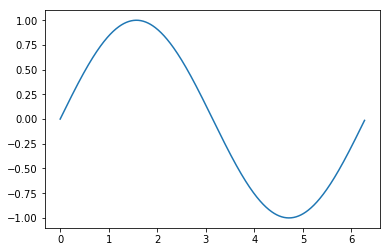

In [3]:
plot(x, y)

## Adding Labels

That was simple: we have plotted y as a function of x. Now let us add labels:

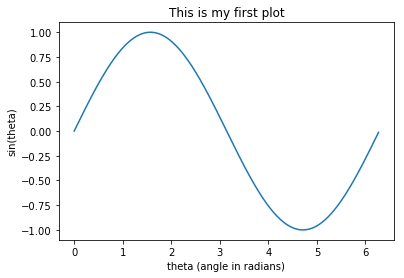

In [4]:
plot(x, y)
plt.xlabel("theta (angle in radians)")
plt.ylabel('sin(theta)')
plt.title("This is my first plot")

## Fancier labels:

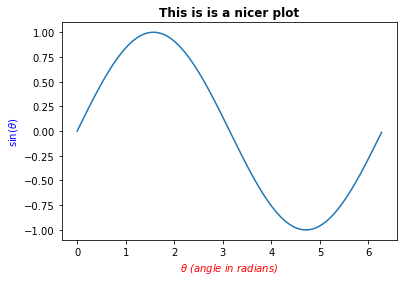

In [5]:
plot(x, y)
xlab = plt.xlabel(r"$\theta$ (angle in radians)") # note the r before quotes
ylab = plt.ylabel(r'sin($\theta$)')
thetitle= plt.title("This is is a nicer plot")
thetitle.set_fontweight('bold')
ylab.set_color('blue')
xlab.set_color('red')
xlab.set_style('italic')

More examples at [http://matplotlib.org/examples/pylab_examples/fonts_demo.html]

## Axis Range and scale

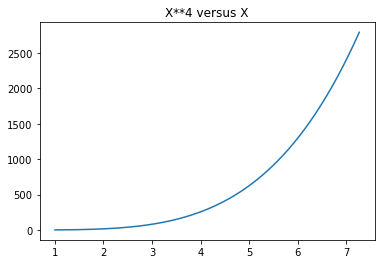

In [6]:
another_x = x+1
plot(another_x,another_x**4)
plt.title('X**4 versus X')

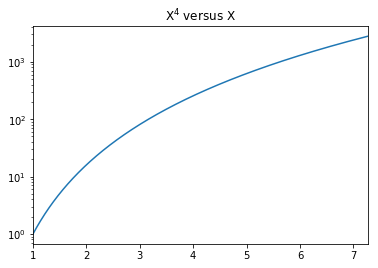

In [7]:
# Let's make it look a bit better
plot(another_x,another_x**4)
plt.title(r'X$^4$ versus X') # The $ signs are for latex inputs
plt.xlim(min(another_x), max(another_x))
plt.yscale('log')
plt.show()

## Overplot

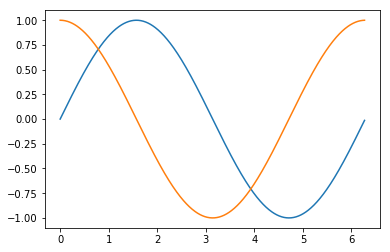

In [8]:
plot(x, y)
plot(x, np.cos(x))

## Styles, symbols and colours

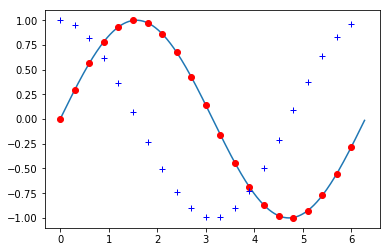

In [9]:
plot(x, y)
x_spaced = np.arange(0, 2.0*np.pi, 0.3)
plot(x_spaced, np.sin(x_spaced), marker='o', color='red', linestyle='None')
plot(x_spaced, np.cos(x_spaced), 'b+')

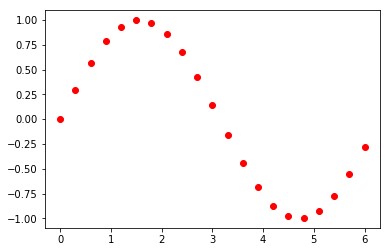

In [10]:
plot(x_spaced, np.sin(x_spaced), marker='o', color='red', linestyle='None')

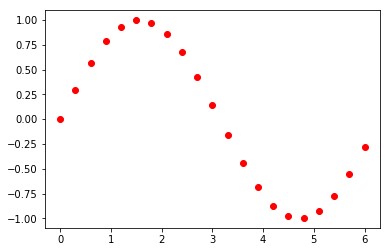

In [11]:
plot(x_spaced, np.sin(x_spaced), 'ro') #specify color and marker in one go!

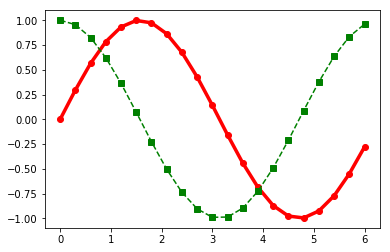

In [12]:
plot(x_spaced, np.sin(x_spaced), 'ro', ls='-',lw=3.5)
plot(x_spaced, np.cos(x_spaced), 'gs', ls='--')

Line Styles
---
* '-'  solid line style
* '--'  dashed line style
* '-.'  dash-dot line style
* ':'  dotted line style

Point symbols
---
* '.' point marker
* ',' pixel marker
* 'o' circle marker
* 'v' triangle_down marker
* '^' triangle_up marker
* '<' triangle_left marker
* '>' triangle_right marker
* '1' tri_down marker
* '2' tri_up marker
* '3' tri_left marker
* '4' tri_right marker
* 's' square marker
* 'p' pentagon marker
* '*' star marker
* 'h' hexagon1 marker
* 'H' hexagon2 marker
* '+' plus marker
* 'x' x marker
* 'D' diamond marker
* 'd' thin_diamond marker
* '|' vline marker
* '_' hline marker


Colours
---
* 'b'         blue
* 'g'         green
* 'r'         red
* 'c'         cyan
* 'm'         magenta
* 'y'         yellow
* 'k'         black
* 'w'         white
* '#ff0000'   RGB codes
* '(0,1,0,1)' RGB + alpha (transparency)

## Legends

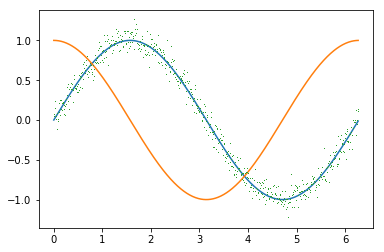

In [13]:
plot(x, y, label='Sine(x)')
plot(x, np.cos(x))
y_scatter = y+np.random.normal(0.0, 0.1, len(x))
plot(x, y_scatter, ls='None', marker=',', label='Fake data with scatter')

*np.random.normal()* generated len(x) data points with mean 0.0 and sigma 0.1.  

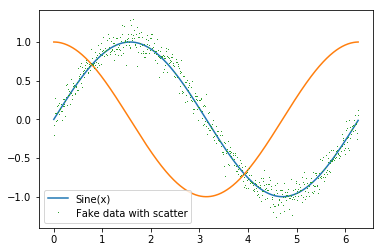

In [14]:
plot(x, y, label='Sine(x)')
plot(x, np.cos(x))
y_scatter = y+np.random.normal(0.0, 0.1, len(x))
plot(x, y_scatter, ls='None', marker=',', label='Fake data with scatter')
legend()

Note that we did not add a "label" keyword in the cos(x) plot, so that is not listed in the legend

## Error bars

<Container object of 3 artists>

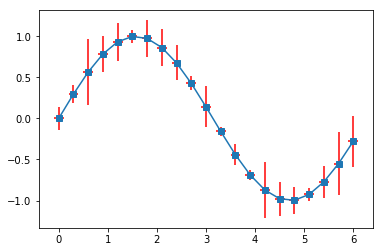

In [15]:
y_error = np.random.normal(0.0, 0.2, len(x_spaced))
x_error = np.repeat(0.1, len(x_spaced))
errorbar(x_spaced, np.sin(x_spaced), yerr=y_error, xerr=x_error,marker='s',ecolor='r')

## Autoscaling of axes

<Container object of 3 artists>

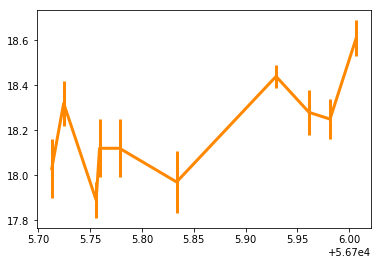

In [16]:
mjd = [56705.7130824, 56705.7245194, 56705.7558403, 56705.7591719, 56705.7784380,
56705.8334423, 56705.9293922, 56705.9611691, 56705.9814212,  56706.0066355]
# continuing on next line is okay
magnitude = [18.03, 18.32, 17.89, 18.12, 18.12, 17.97, 18.44, 18.28, 18.25, 18.61]
magerr = [0.13, 0.10, 0.08, 0.13, 0.13, 0.14, 0.05, 0.10, 0.09, 0.08]
errorbar(mjd, magnitude, yerr=magerr,color='#ff8800',lw=3)

Note the X axis: Matplotlib has automatically subtracted a constant and made the plot more readable.

In [17]:
errorbar(mjd, magnitude, yerr=magerr, 'ro') # does not work

SyntaxError: positional argument follows keyword argument (<ipython-input-17-4403ce3cc972>, line 1)

<Container object of 3 artists>

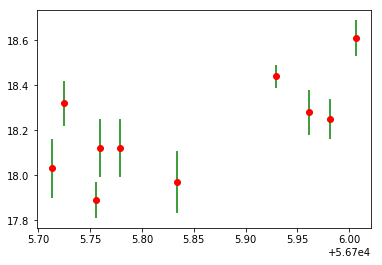

In [18]:
# instead of shorthand, give the full command
errorbar(mjd, magnitude, yerr=magerr, marker='o', color='r', ecolor='g', ls='None')

Note: Y axis is still flipped. Higher magnitude is fainter, so it should be plotted below.  
*How can we change this?*

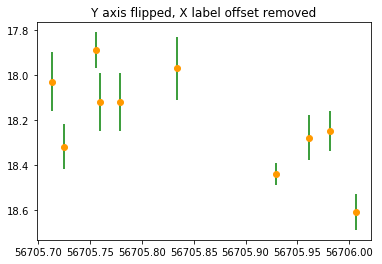

In [19]:
errorbar(mjd, magnitude, yerr=magerr, marker='o', color='#ff9900', ecolor='g', ls='None')
ymin, ymax = plt.ylim()
plt.ylim(ymax, ymin)
plt.ticklabel_format(useOffset=False)
plt.title("Y axis flipped, X label offset removed")

X axis labels: the offset is not subtracted anymore, but now labels are hard to read.

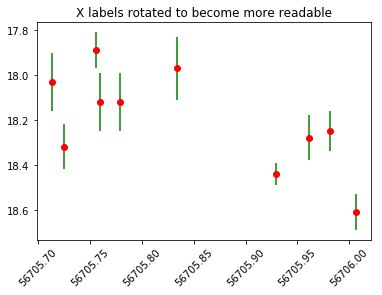

In [20]:
errorbar(mjd, magnitude, yerr=magerr, marker='o', color='r', ecolor='g', ls='None')
ymin, ymax = plt.ylim()
plt.ylim(ymax, ymin)
plt.ticklabel_format(useOffset=False)
plt.xticks(rotation=45)
plt.title("X labels rotated to become more readable")

Scatter plots
===

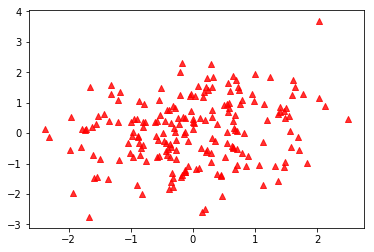

In [21]:
dist1=np.random.normal(0.,1.,200)
dist2=np.random.normal(0.,1.,200)
scatter(dist1,dist2,c='r',marker='^',alpha=0.8)
                       

Histogram
===

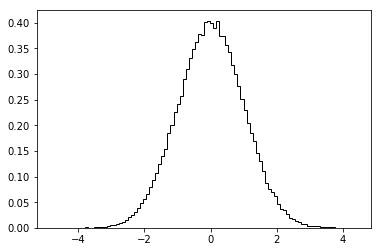

In [22]:
dist1 = np.random.normal(0.,1.,100000)  #mean 0., std. devn = 1., N sized array
n,bins,patches= pylab.hist(dist1,bins=100,color='k',normed=True,histtype='step')
savefig('normaldistribution.png')

Subplots
===

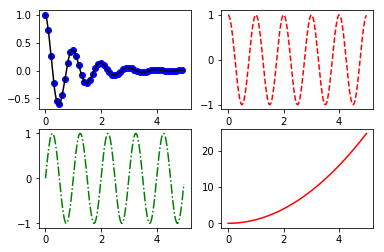

In [23]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)
    #return np.sin(t)/t
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(221); plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(222); plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.subplot(223); plt.plot(t2,np.sin(2.*np.pi*t2),'g-.')

plt.subplot(224); plt.plot(t2,t2**2,'r-')

savefig('subplots.png'); savefig('subplots.eps'); savefig('subplots.svg')

Contour plots
===

<a list of 5 text.Text objects>

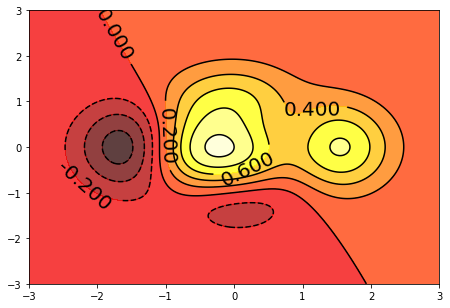

In [24]:
def f(x,y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256; x = np.linspace(-3, 3, n); y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)
axes([0.025, 0.025, 0.95, 0.95])
contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=cm.hot)
C = contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
clabel(C, inline=1, fontsize=20)


3D plotting with mplot3d
===

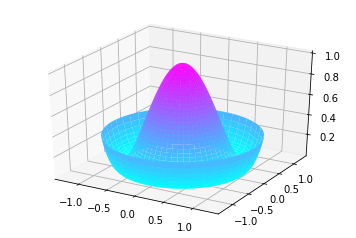

In [25]:
#See: http://matplotlib.org/examples/mplot3d/surface3d_radial_demo.html
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = np.linspace(0,1.25,50) # create supporting points in polar coordinates
p = np.linspace(0,2*np.pi,50)
R,P = np.meshgrid(r,p)
X,Y = R*np.cos(P),R*np.sin(P) # transform them to cartesian system
Z = ((R**2 - 1)**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.cool)

This talk was a quick tour of matplotlib
===

Many aspects could not be covered in the short time available. Matplotlib is learnt quickest by trying the examples.
---

1. See demos here: http://matplotlib.org/gallery.html
2. Find the plot that is closest to your requirement
3. Modify the code to suit your requirement
4. Remember: making good plots takes a lot of time and effort

What I have not covered: **aplpy** APLpy (the Astronomical Plotting Library in Python) is a Python module aimed at producing publication-quality plots of astronomical imaging data in FITS format. 
